# Welcome to the Bruin Quants Intro to Algotrading Workshop!

### What you can expect to learn (by week)
1. How to use APIs to gather historical data and technical analysis
2. Writing and backtesting basic algorithms 
3. Streaming live market data using websockets, high frequency trading and arbitrage
4. Basics of statistical arbitrage, time series analysis
5. Implementing a pairs trading algorithm

# JSON Tutorial

### What is JSON?
JSON is an acronym for ```JavaScript Object Notation```.
-    A JavaScript "Object" is very similar to what we know in Python as "dictionaries".
        -  **Note :** JavaScript Objects are also very similar to JavaScript maps, which would be considered the "true Python Dictionary equvialent".
       - **Warning :** In JavaScript, an Object is a type of object, so a Javascript Object is essentially an "Object object" which can be confusing to many people. You don't have to understand the distinction for the purposes of this this course.
-   Much like Python dictionaries, there are "keys", which each have "values".
-   The JSON file format provides an efficient way of transmiting data from once place to another. 
        - (ex sending data from backend to frontend.)

### What is a Python dictionary?
A Python dictionary is essentially a list of "keys" and "values".
-    Every key is matched with a value.
        - **Note :** Keys cannot be mutable—only values can be. 
                - (ex a key cannot be a list, but a value can be a list.)
-    Think of the keys as the words in a real dictionary, and the values the definition of the words.
    
### Example JSON File
Example of a JSON file :
```JSON
{"menu": {
    "id": "file",
    "value": "File",
    "popup": {
        "menuitem": [
                {"value": "New", "onclick": "CreateNewDoc()"},
                {"value": "Open", "onclick": "OpenDoc()"},
                {"value": "Close", "onclick": "CloseDoc()"}
        ]
    }
}}
```
-    Here, the string, `"menu"`, is the key to the Object value.
-    `"id"` is the key to the `"file"` value.
-    `"value"` is the key to the `"File"` value.
-    `"menuitem"` is the key to a list (aka array) value.
-    and so on...

### Combining Python and JSON
Important Python libaries and modules for JSON :
-    **requests**
        - a library that allows you to request files from a server using HTTP (HyperText Transfer Protocol).
-    **json** 
        - a library that allows you to decode and interact with JSON files within a Python program.

### Example Python code using JSON
```python3
# import the necessary libraries
import requests
import json

# request a file from the server
raw_file = requests.get(url='https://example.com/test.json')

# decode the string into equivalent Python data types
decoded_file = json.loads(raw_json_file.content)

# now, you can use regular Python syntax such as index operators to get the data you want
print(decoded_file['menu']['id'])
>>> file

print(decoded_file['menu']['menuitem'][0])
>>> {"value": "New", "onclick" : "CreateNewDoc()"}

print(decoded_file['menu']['menuitem'][2]['onclick'])
>>> CloseDoc()
```

### Final Remarks
JSON is extremely important in the world of programming :
-    JSON is an extremely convenient way to transfer data, and most modern day programming languages support JSON decoding and interaction.
-   JSON will be very important for the purposes of this course, because the API we will be using returns relevant data in the JSON file format.


# API Tutorial

### What is an API?
API is an acronym for `Application Programming Interface`.
-    An API is an interface which can allow for software intermediaries to communicate with one another.
        - APIs are most commonly associated with web-development, where an API can serve as an intermediary between frontend and backend code.
        - Most modern APIs adhere to HTTP and REST standards.
-   Many software as a service (SaaS) services provide APIs that allow clients to connect their programs to the service's.
       - (ex Twitter, Yahoo Finance, Skyscanner, Alpaca, etc.)

### What is HTTP?
HTTP is an acronym for `HyperText Transfer Protocol`.
-   HTTP is a protocol used to transfer files over the web.
	- HTTP utilizes TCP (Transmission Control Protocol) to do this.
- There is no need to have a deep understanding of HTTP for the purposes of this course.
      
### What is REST?
REST is an acronym for `REpresentational State Transfer`.
-   REST is a architectual style that uses existing technology and protocols of the Web.
-   REST systems are based off of requests and responses.
-   REST almost always *utilizes* HTTP because it's the standard for web-based protocols.
	   - **Warning :** You have most likely heard of "RESTful" APIs. The distinction between REST and RESTful can be murky, but RESTful is often used as an adjective to describe something that conforms to the REST architecture. In most scenarios, the two can be used interchangeably.
- REST's most important features are... : 
	- The requesting systems (the program you wrote) are able to make requests to access or manipulate web resources.
	- When making a request, you can send a header which is additional information about the request
		-  (ex you may need to send authentication tokens to get a response in the first place.)
    - There exists at least one endpoint (URL in most cases).
    - All operations are *stateless*. This means that the current state of the requester does not matter.
	- Data is returned (a response) in a lightweight data format such as `JSON`.
	- Utilizes `CRUD` operations for requests.

### What is CRUD?
CRUD is an acronym for `Create, Read, Update, Delete`.
-   CRUD operations are linked to their respective basic *HTTP Verbs*.
  	- POST : Create new data
    - GET : Read data
    - PUT : Update data 
    - DELETE : Delete data
-   These operations are important because they serve as the building blocks for communication between the requester and web resource.
-   When making a request, you will use one of these verbs.  You can figure out the verb by looking at the documentation.  For example, in the Alpaca API, to get our account information it says ```GET /v2/account```, which tells us to use a get request to the following url.  



### Combining Python and RESTful APIs
Important Python libraries and modules for RESTful APIs :
-   **requests**
     - a library that allows you to request files from a server using HTTP (HyperText Transfer Protocol)


### Example Python code using Requests
```python3
# import the necessary libraries
import requests

# request a file from an endpoint with the GET verb
raw_file = requests.get(url='https://example.com/test.json')

# request a file from an endpoint with the GET verb with headers
raw_file = requests.get(url='https://example.com/test.json', headers={'KEY-ID': something, 'SECRET-KEY' : something})

```

### Final Remarks
APIs are extremely important in our everyday lives.
-   Without APIs, many of the services we depend on will not work.
      - (ex phone weather services, many sms platforms, etc.)
-   APIs allow us to easily transfer data between different systems through the Web.



We're using the Alpaca API, which is a free platform that allows us to fetch historical data, connect to live market data streams, and post orders in a paper trading account to test our performance.  We'll develop some of the code we need to execute these requests now.  

In [1]:
BASE_URL = "https://paper-api.alpaca.markets"  # tells the browser where we want to connect to

ACCOUNT_URL = f"{BASE_URL}/v2/account"
ORDER_URL = f"{BASE_URL}/v2/orders"
POSITIONS_URL = f"{BASE_URL}/v2/positions"
ASSETS_URL = f"{BASE_URL}/v2/assets"

HISTORICAL_URL = "https://data.alpaca.markets"  # separate url for historical data

### In a separate file called ```config.py``` we have the following code: 

We do this because for security purposes we really don't want our API keys floating around publically on 
the internet.  When you go to run this code on your own make sure to just copy/paste your keys into their 
respective places in this file so everything can run properly

```python

BASE_URL = "https://paper-api.alpaca.markets"
KEY = "Your API Key Here"
SECRET_KEY = "Your Secret Key Here"

HEADERS = {"APCA-API-KEY-ID": KEY, "APCA-API-SECRET-KEY": SECRET_KEY}

# headers are used to authenticate our request
```

The simplest thing we can do right now is look at our account information.  To do this we will use the requests module
to send a get request. 

In [3]:
import requests
import json
from config import *

def get_account():
    # get our account information - cash, value invested, ect.
    # basically every API request we'll be doing takes in two pieces of info - the url we want and headers to a
    # authenticate our request
    r = requests.get(url=ACCOUNT_URL, headers=HEADERS)
    # json.loads takes the json string and transforms it to easy to use a python dictionary
    # the .content basically gives us the json string the server returns
    return json.loads(r.content)

In [4]:
get_account()

{'id': '1f38506f-1ec5-4cfb-878b-2a7dd7b724c0',
 'account_number': 'PA24PG1O6C2A',
 'status': 'ACTIVE',
 'currency': 'USD',
 'buying_power': '303769.962',
 'regt_buying_power': '115502.01',
 'daytrading_buying_power': '303769.962',
 'cash': '16220.49',
 'portfolio_value': '99410.74',
 'pattern_day_trader': False,
 'trading_blocked': False,
 'transfers_blocked': False,
 'account_blocked': False,
 'created_at': '2020-12-06T19:34:12.3305Z',
 'trade_suspended_by_user': False,
 'multiplier': '4',
 'shorting_enabled': True,
 'equity': '99410.74',
 'last_equity': '101574.61',
 'long_market_value': '83190.25',
 'short_market_value': '0',
 'initial_margin': '41659.735',
 'maintenance_margin': '24957.075',
 'last_maintenance_margin': '25567.707',
 'sma': '0',
 'daytrade_count': 0}

In [5]:
def get_positions():
    # returns our portfolio - set of all our positions (ie what we have bought)
    r = requests.get(url=POSITIONS_URL, headers=HEADERS)
    return json.loads(r.content)


def make_order(symbol: str, qty: int, side: str, order_type: str, time_in_force: str, limit_price: float):
    # check out the orders documentation to see in depth what these mean.
    # Type, time in force, and limit price can definitely be a bit confusing
    data = {
        "symbol": symbol,
        "qty": qty,  # number of shares
        "side": side,  # buy or sell
        "type": order_type,  # will usually be market or limit
        "time_in_force": time_in_force,  # usually gtc(good till cancelled) or ioc(immediate or cancel)
        "limit_price": limit_price  # required if our type is limit. This is the maximum price we're willing to pay
    }
    r = requests.post(url=ORDER_URL, json=data, headers=HEADERS)
    return json.loads(r.content)

def get_orders():
    # returns orders that have not yet become positions
    r = requests.get(url=ORDER_URL, headers=HEADERS)
    return json.loads(r.content)

def delete_orders():
    # attempt to close all open orders (i.e. haven't been filled), returns 500 if order is no longer cancellable

    # we might want to do this for various reasons: say we have lots of orders we placed in after hours that won't be
    # filled until the start of the next trading day.  If the market gets bad then we might want to cancel the orders
    r = requests.delete(url=ORDER_URL, headers=HEADERS)
    return json.loads(r.content)

Those functions are all basically everything we need to interact with the API, and it covers all the obvious actions we would want to take as a trader such as seeing our account info, making a new order, and getting our portfolio.

We can now use some of these functions.  

In [6]:
acc = get_account()
acc

{'id': '1f38506f-1ec5-4cfb-878b-2a7dd7b724c0',
 'account_number': 'PA24PG1O6C2A',
 'status': 'ACTIVE',
 'currency': 'USD',
 'buying_power': '303769.962',
 'regt_buying_power': '115502.01',
 'daytrading_buying_power': '303769.962',
 'cash': '16220.49',
 'portfolio_value': '99410.74',
 'pattern_day_trader': False,
 'trading_blocked': False,
 'transfers_blocked': False,
 'account_blocked': False,
 'created_at': '2020-12-06T19:34:12.3305Z',
 'trade_suspended_by_user': False,
 'multiplier': '4',
 'shorting_enabled': True,
 'equity': '99410.74',
 'last_equity': '101574.61',
 'long_market_value': '83190.25',
 'short_market_value': '0',
 'initial_margin': '41659.735',
 'maintenance_margin': '24957.075',
 'last_maintenance_margin': '25567.707',
 'sma': '0',
 'daytrade_count': 0}

In [7]:
pos = get_positions()
pos

[{'asset_id': '2d9e926c-e17c-47c3-ad8c-26c7a594e48f',
  'symbol': 'QQQ',
  'exchange': 'NASDAQ',
  'asset_class': 'us_equity',
  'qty': '10',
  'avg_entry_price': '310.14',
  'side': 'long',
  'market_value': '3141.9',
  'cost_basis': '3101.4',
  'unrealized_pl': '40.5',
  'unrealized_plpc': '0.0130586186883343',
  'unrealized_intraday_pl': '2.7',
  'unrealized_intraday_plpc': '0.0008600917431193',
  'current_price': '314.19',
  'lastday_price': '313.92',
  'change_today': '0.0008600917431193'},
 {'asset_id': 'b6d1aa75-5c9c-4353-a305-9e2caa1925ab',
  'symbol': 'MSFT',
  'exchange': 'NASDAQ',
  'asset_class': 'us_equity',
  'qty': '3',
  'avg_entry_price': '215.08',
  'side': 'long',
  'market_value': '645.15',
  'cost_basis': '645.24',
  'unrealized_pl': '-0.09',
  'unrealized_plpc': '-0.0001394829830761',
  'unrealized_intraday_pl': '0.36',
  'unrealized_intraday_plpc': '0.0005583213139162',
  'current_price': '215.05',
  'lastday_price': '214.93',
  'change_today': '0.000558321313916

In [8]:
order = make_order("AAPL", 1, "buy", "market", "day", None)
order
# None is because we don't specify limit order, which is a requirent to buy/sell the asset at the specified price
# or better for market order.  Market orders are not as strict and we'll just take whatever price we can get.  

{'id': '575f0305-077f-4cd9-9166-2f29f003f111',
 'client_order_id': '699d2e15-b8dd-4050-b39c-973147a6c2ce',
 'created_at': '2021-01-13T04:08:15.960222Z',
 'updated_at': '2021-01-13T04:08:15.960222Z',
 'submitted_at': '2021-01-13T04:08:15.953407Z',
 'filled_at': None,
 'expired_at': None,
 'canceled_at': None,
 'failed_at': None,
 'replaced_at': None,
 'replaced_by': None,
 'replaces': None,
 'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
 'symbol': 'AAPL',
 'asset_class': 'us_equity',
 'qty': '1',
 'filled_qty': '0',
 'filled_avg_price': None,
 'order_class': '',
 'order_type': 'market',
 'type': 'market',
 'side': 'buy',
 'time_in_force': 'day',
 'limit_price': None,
 'stop_price': None,
 'status': 'accepted',
 'extended_hours': False,
 'legs': None,
 'trail_percent': None,
 'trail_price': None,
 'hwm': None}

### Getting historical data
Historical data is indespensible for gathering insights about the market and testing our ideas on past market actions.  Luckily Alpaca gives us a method to access historical data for US assets.  

In [9]:
def get_historical_data(timeframe: str, symbols: str, limit: int, start: str, end: str):
    # timeframe is our frequency, one of: minute, 1min, 5min, 15min, day, 1D
    # gets data for our symbols between start and end.  If we include multiple, separate by commas
    # limit is the max number of instances we want to show in the response

    url = f"{HISTORICAL_URL}/v1/bars/{timeframe}?symbols={symbols}&limit={limit}&start={start}&end={end}"
    r = requests.get(url=url, headers=HEADERS)
    return json.loads(r.content)

### Pandas
Once we have our data, we want to transfom it to a nice to work with data structure.  Pandas is a library that allows us to make dataframes (tables) of data, which can be handled similarly to multi-dimensinal arrays.  For now we really only need one function, but along the way you'll pick up a lot of pandas.  This is probably the most important python library for data science tasks and data exploration.

In [10]:
import pandas as pd

def make_dataframe(json_data: dict, asset: str):
    # our json data gets unpacked to a dictionary keyed by the column names
    # if we get many assets from historical data, it's easist to just pick one asset to make a dataframe with since
    # multi-indexing becomes very tedious
    return pd.DataFrame.from_dict(json_data[asset])

In [12]:
historical = get_historical_data("day", "MSFT", 365, '2020-01-01', '2020-12-31')

# gets one year of historical microsoft data
msft = make_dataframe(historical, "MSFT")
msft

,t,o,h,l,c,v
0,1564718400,138.09,138.3200,135.2600,136.90,23579396
1,1564977600,133.30,133.9298,130.7800,132.20,35492393
2,1565064000,133.80,135.6800,133.2100,134.66,25230023
3,1565150400,133.80,135.6500,131.8284,135.28,26194932
4,1565236800,136.60,138.9900,135.9300,138.91,20703630
...,...,...,...,...,...,...
360,1609909200,212.17,216.4899,211.9400,212.22,29768110
361,1609995600,214.04,219.3400,213.7100,218.29,20366208
362,1610082000,218.68,220.5800,217.0261,219.55,18248721
363,1610341200,218.47,218.9100,216.7300,217.50,15604905


Columns:

t: unix time

o: day open price

h: day high price

l: day low price

c: day close price

v: day volume (shares traded)

# Visualizing our Data

```matplotlib.pyplot``` is the go to library for data visualization, and we'll be using it a lot.

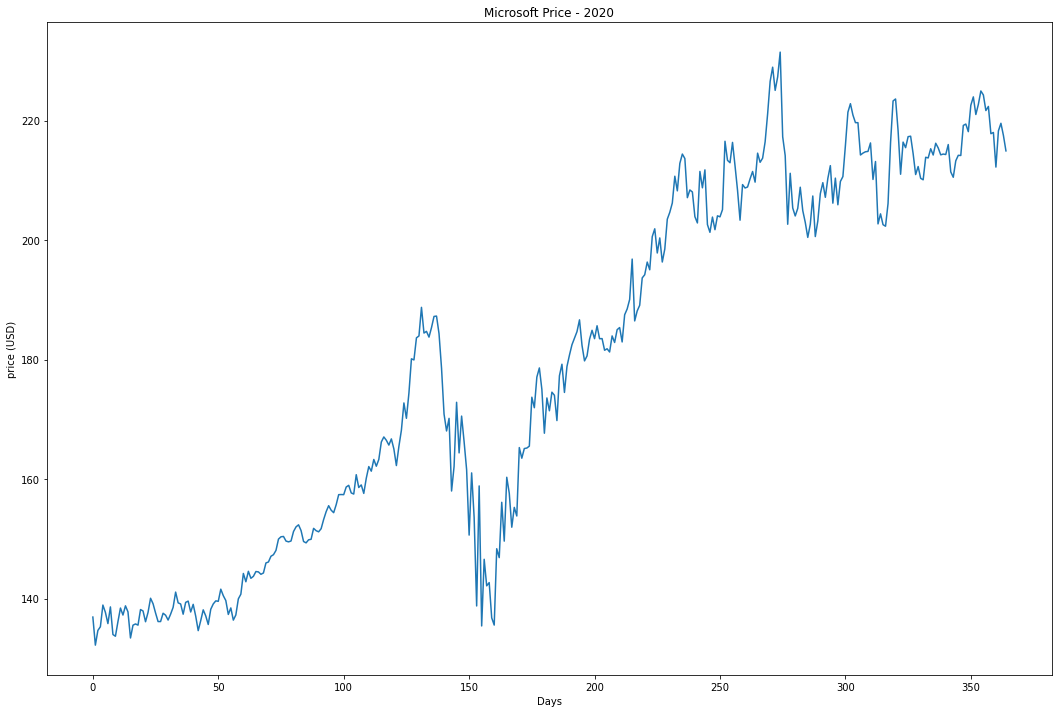

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 12))  # make our plot bigger

plt.plot(msft["c"])  # plots daily close price - can access pandas columns like a dictionary
plt.xlabel("Days")
plt.ylabel("price (USD)")
plt.title("Microsoft Price - 2020")
plt.show()  # renders our plot

# Basic Technical Analysis
- Technical analysis is a financial tool focused on quantifying price movement and identifying trading opportunities.
    - This is done through **technical indicators**, mathematical functions that, given some price data, return values that have some significance when interpreted.  
        - Really simple examples include **moving averages**, which take the mean price over some time window.
        - More complex ones try to incorporate trends and momentum for a stock.  A few examples are **RSI** (relative strength index), and **MACD** (moving average convergence-divergence).
        
### Plotting a Moving Average
```pandas``` has a ```rolling``` method for dataframes, which easily performs our needed calculation.

In [14]:
mean_30 = msft.rolling(window=30).mean()
mean_30

,t,o,h,l,c,v
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
360,1.607951e+09,216.801167,218.682983,214.966970,216.991833,2.108267e+07
361,1.608080e+09,216.904167,218.917983,215.151970,217.265167,2.112301e+07
362,1.608210e+09,217.207167,219.128983,215.424173,217.454833,2.076273e+07
363,1.608345e+09,217.319167,219.249650,215.566507,217.579833,2.069440e+07


We get NaN for the first 30 values because we need 30 values to get a full window.

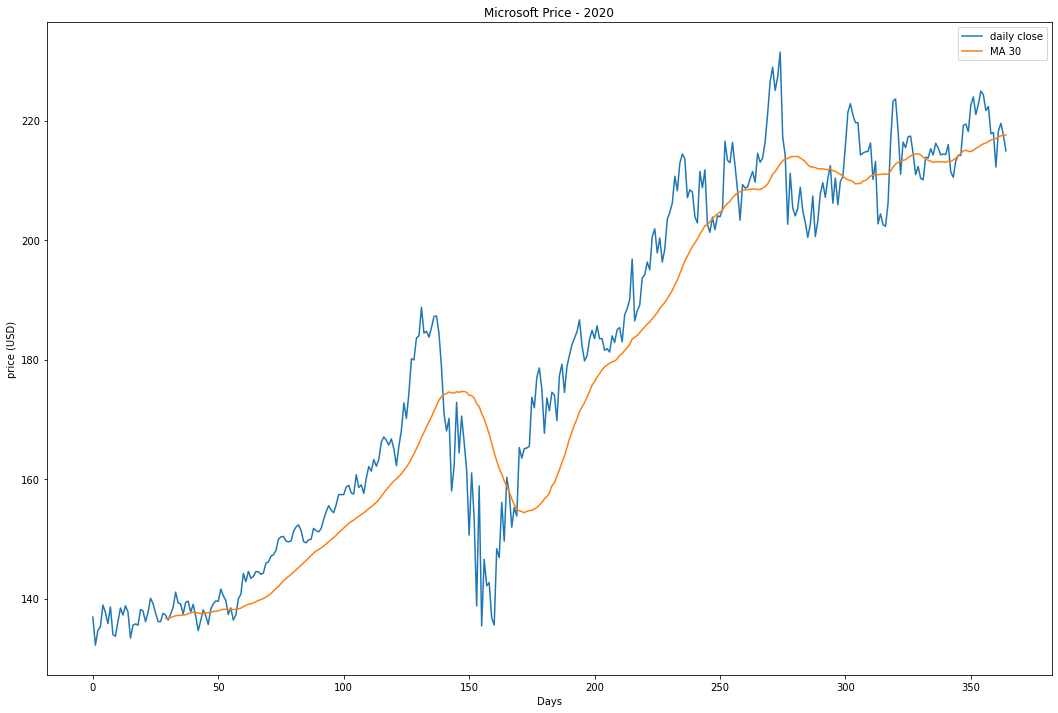

In [15]:
fig = plt.figure(figsize=(18, 12))

plt.plot(msft["c"], label="daily close")  # plots daily close price - can access pandas columns like a dictionary
plt.plot(mean_30['c'], label="MA 30")
plt.xlabel("Days")
plt.ylabel("price (USD)")
plt.title("Microsoft Price - 2020")
plt.legend()  # render labels
plt.show()  # renders our plot

We can see that this 30 day moving average filters out a lot of the noise that we get in the price movement and focuses more on the longer term trends.

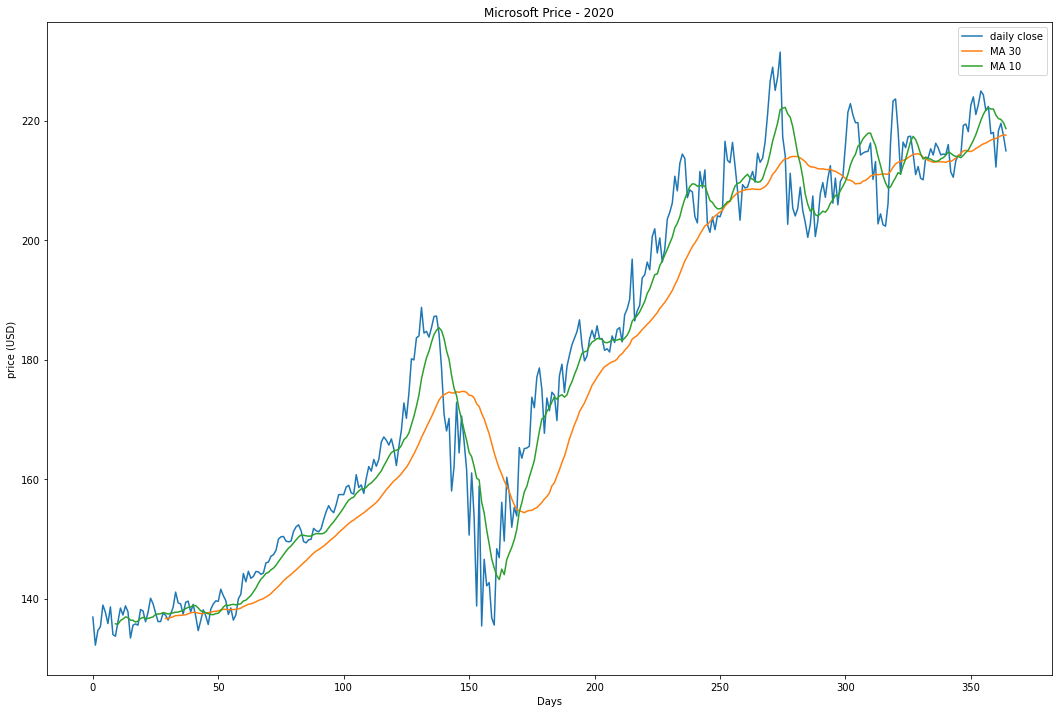

In [16]:
fig = plt.figure(figsize=(18, 12))

mean_10 = msft.rolling(window=10).mean() # shorter moving average will give different results

plt.plot(msft["c"], label="daily close")  # plots daily close price - can access pandas columns like a dictionary
plt.plot(mean_30['c'], label="MA 30")
plt.plot(mean_10['c'], label="MA 10")
plt.xlabel("Days")
plt.ylabel("price (USD)")
plt.title("Microsoft Price - 2020")
plt.legend()  # render labels
plt.show()  # renders our plot

### Calculating the RSI

The RSI is calculated as follows:
\$ RS  = \frac{\text{rolling mean returns for up days}}{\text{rolling mean returns for down days}} \$

where an up day is a day where the asset closes higher than it opens, opposite for down days

\$ RSI = 100 - \frac{100}{1 + RS} \$

In [17]:
def RSI(asset, n=14):
    # accept pandas dataframe
    
    # calculate first difference on close prices
    close_pct = asset["c"].diff()

    days_up, days_down = close_pct.copy(), close_pct.copy()
    
    # fill days where days_up is negative with 0, similarly for days_down
    days_up[days_up < 0] = 0
    days_down[days_down > 0] = 0
    
    # calculate rolling mean and divide to find relative strength
    RS = days_up.rolling(window=n).mean() / days_down.rolling(window=n).mean().abs()
    
    RSI = 100 - (100 / (1 + RS))
    return RSI

In [18]:
rsi_msft = RSI(msft, n=14)
rsi_msft

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
360    47.126777
361    48.706897
362    50.181412
363    49.112264
364    39.010357
Name: c, Length: 365, dtype: float64

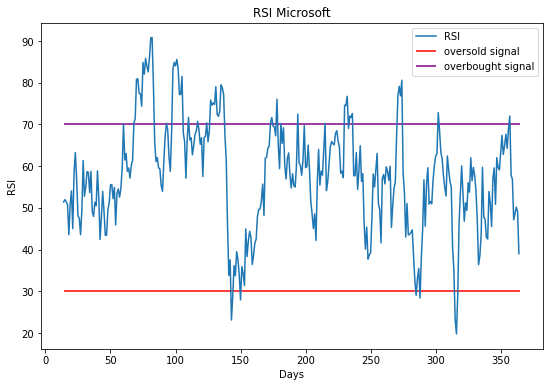

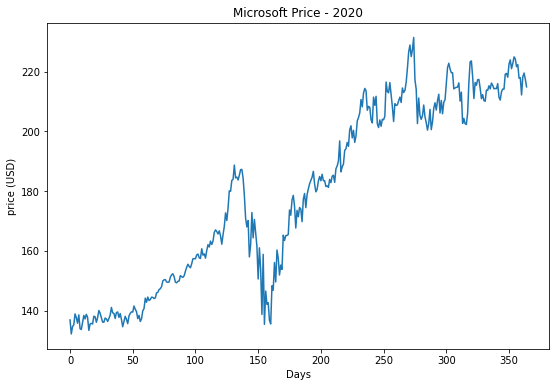

In [21]:
fig = plt.figure(figsize=(9, 6))

plt.plot(rsi_msft, label="RSI")  # plots daily close price - can access pandas columns like a dictionary
plt.hlines(30, 14,  len(rsi_msft), colors="red", label="oversold signal")
plt.hlines(70, 14,  len(rsi_msft), colors="purple", label="overbought signal")
plt.xlabel("Days")
plt.ylabel("RSI")
plt.title("RSI Microsoft")
plt.legend()
plt.show()

fig = plt.figure(figsize=(9, 6))  # make our plot bigger

plt.plot(msft["c"])  # plots daily close price - can access pandas columns like a dictionary
plt.xlabel("Days")
plt.ylabel("price (USD)")
plt.title("Microsoft Price - 2020")
plt.show()  # renders our plot

This gives us a really good start so that we can gather data, test our strategies, and visualize our data.  We'll be building on these throughout the rest of the course.  

Next week we'll look specificially about how to build and test some basic trading algorithms, and we'll also get a good opportunity to talk about baselining our model, overfitting, and analyzing results, so stay tuned.